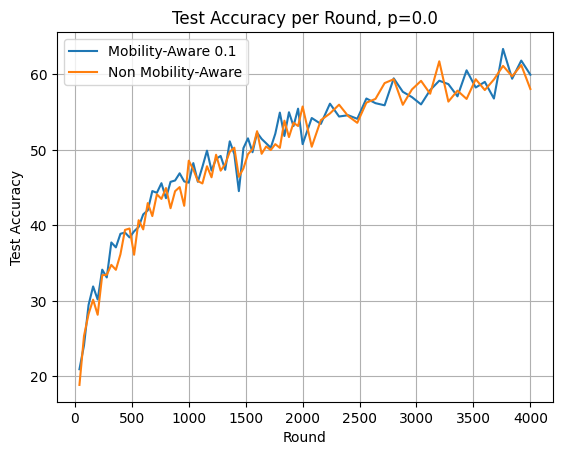

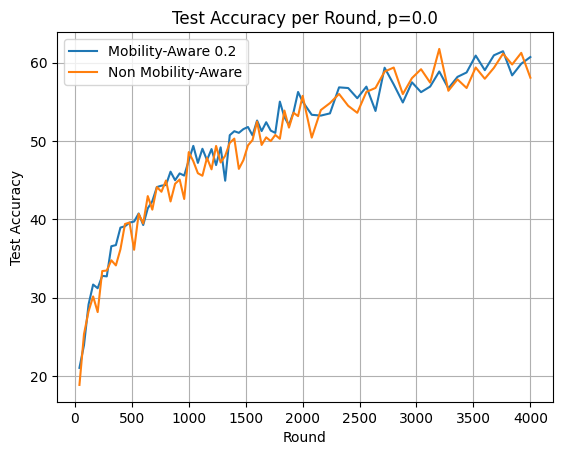

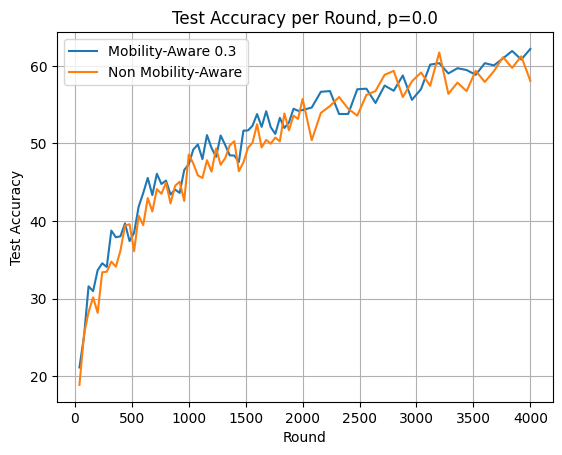

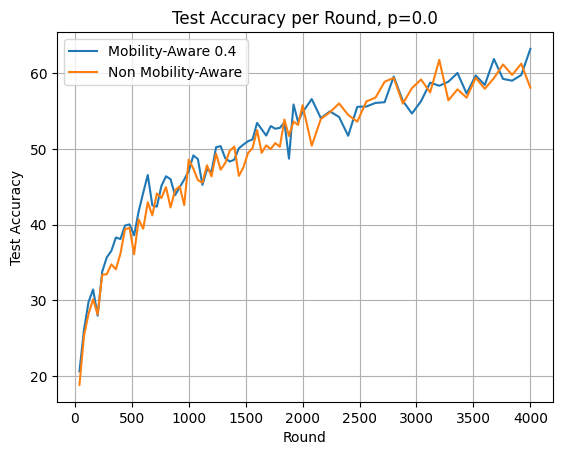

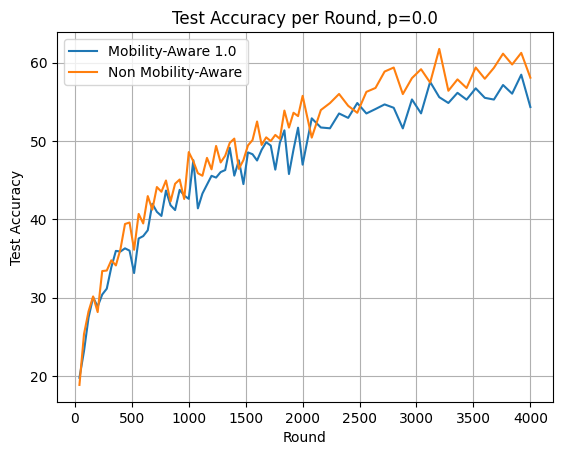

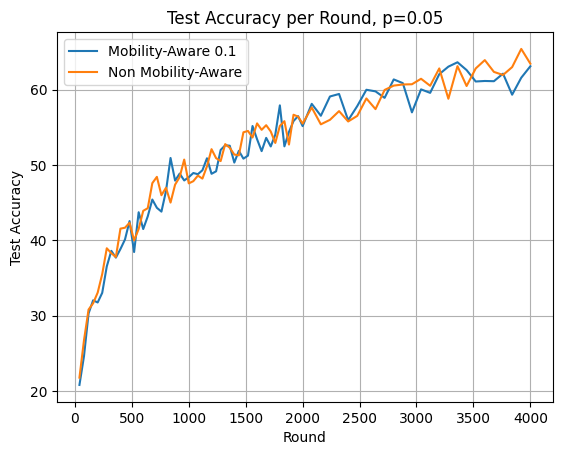

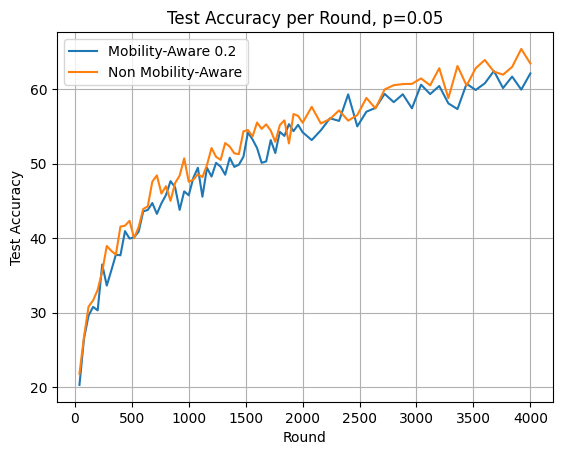

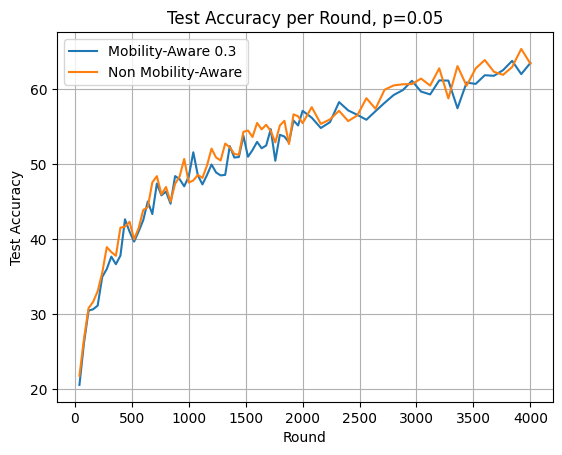

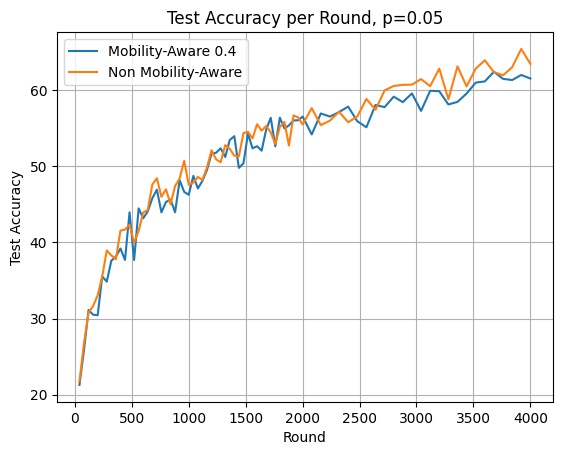

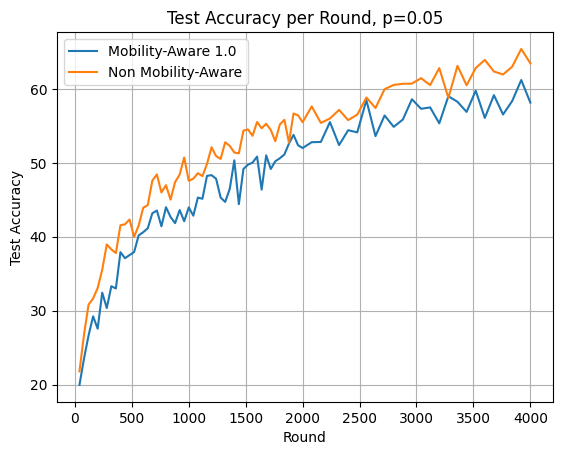

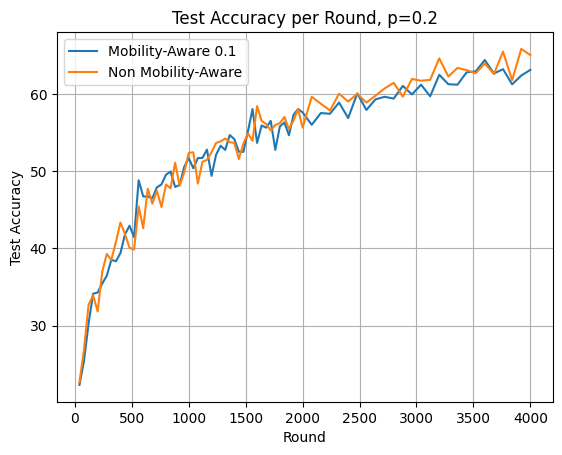

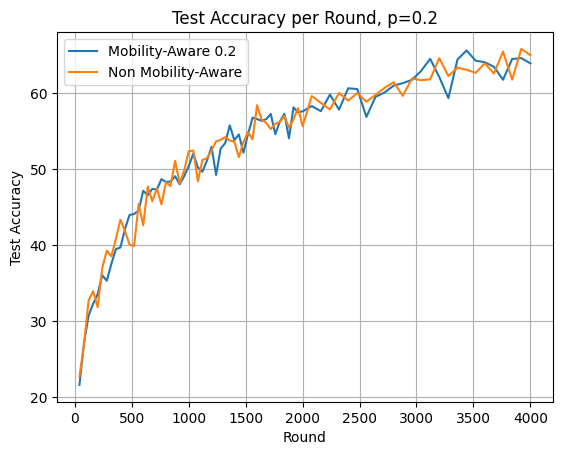

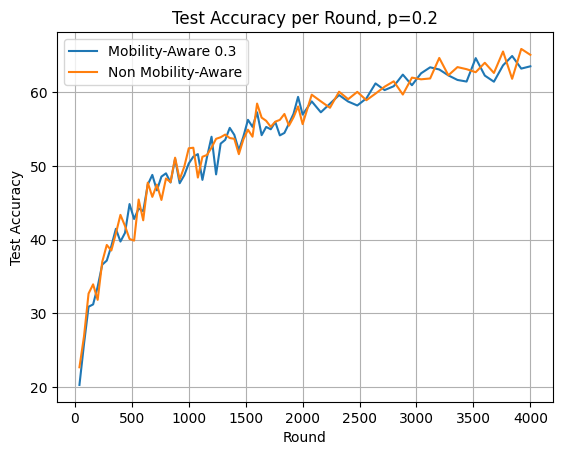

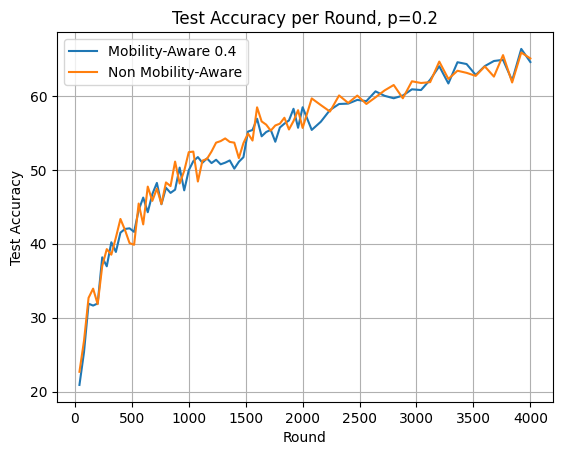

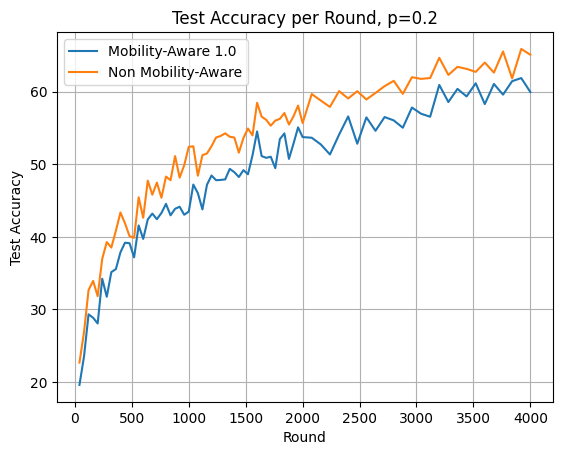

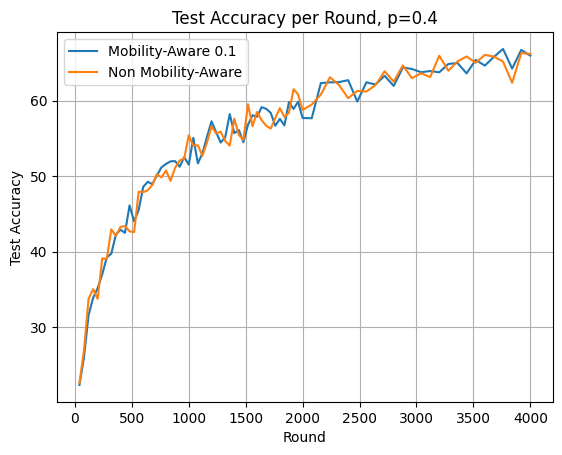

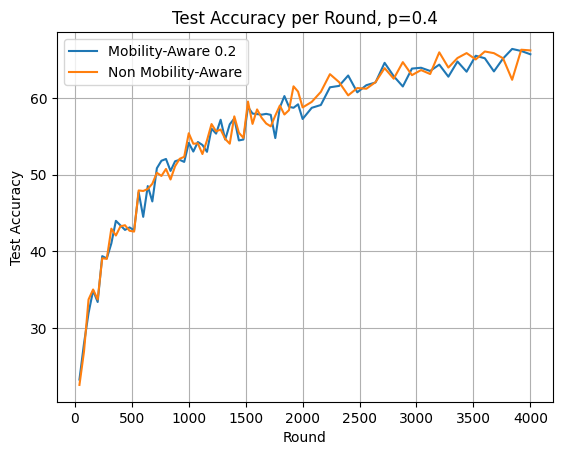

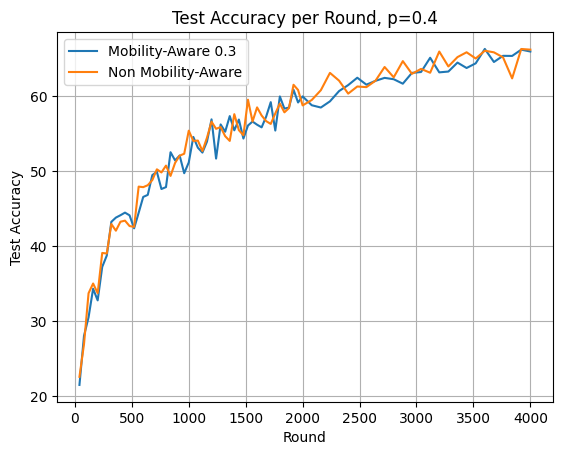

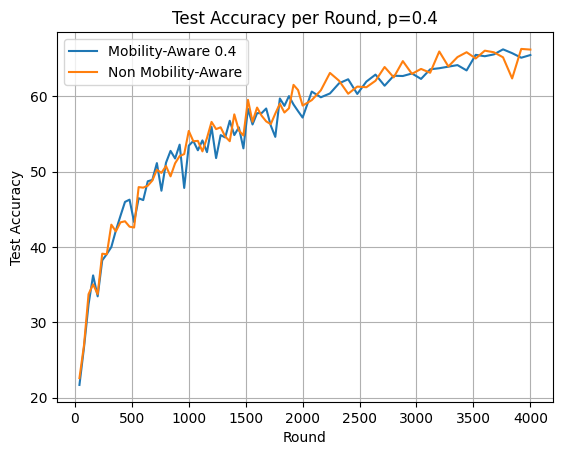

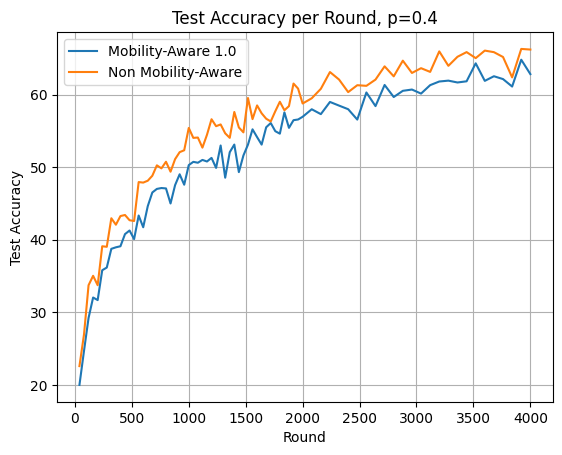

In [25]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt    
from collections import defaultdict


class Experiment:
    def __init__(self, mobility_aware, alpha, niid):
        self.mobility_aware = mobility_aware
        self.alpha = alpha
        self.niid = niid

    def key(self):
        yes_mob_aware_key = f"mobility_aware_niid_{self.niid}_{self.alpha}"
        non_mob_aware_key = f"non_mobility_aware_niid_{self.niid}"

        k = yes_mob_aware_key if self.mobility_aware else non_mob_aware_key
        return k


interesting_ps = [0.0, 0.05, 0.2, 0.4]
sol_experiments = [
    Experiment(True, 0.1, True),
    Experiment(True, 0.2, True),
    Experiment(True, 0.3, True),
    Experiment(True, 0.4, True),
    Experiment(True, 1.0, True),
]
baseline = Experiment(False, None, True)

def inf_dict():
    return defaultdict(inf_dict)

statistic = "test_acc"

def plot_test_accuracy_averages(p, experiment):
    file_name = "saved_figures/test_accuracy_avg.json"
    statistic = "test_acc"
    with open(file_name) as file:
        content = json.load(file)

        exp_key = str(p)

        yes_mob_aware_key = experiment.key()
        non_mob_aware_key  = baseline.key()
        
        if yes_mob_aware_key not in content[exp_key] or non_mob_aware_key not in content[exp_key]:
            raise ValueError("Missing data for comparison, experiment", experiment)

        mobility_aware_exp = content[exp_key][yes_mob_aware_key]
        non_mobility_aware_exp = content[exp_key][non_mob_aware_key]

        if len(mobility_aware_exp) != len(non_mobility_aware_exp):
            raise ValueError("Different number of rounds for mobility aware and non mobility aware experiment")
        
        plt.figure()
        rounds, acc_values = zip(*mobility_aware_exp.items())
        rounds = [int(x) for x in rounds]
        plt.plot(rounds, acc_values, label=f"Mobility-Aware {experiment.alpha}")

        rounds, acc_values = zip(*non_mobility_aware_exp.items())
        rounds = [int(x) for x in rounds]
        plt.plot(rounds, acc_values, label="Non Mobility-Aware")

        plt.xlabel("Round")
        plt.ylabel("Test Accuracy")
        plt.title(f"Test Accuracy per Round, p={p}")
        plt.legend()
        plt.grid(True)
        # fig_dir = f"saved_figures/{experiment_dir}"
        # if not os.path.exists(fig_dir):
        #     os.makedirs(fig_dir)
            

        #     plt.savefig(f"{fig_dir}/test_accuracy_group_{[str(s) for s in experiments]}_{experiment_group}_{experiment_dir}.pdf")
        # if show:
        #     plt.show()

for p in interesting_ps:
    for experiment in sol_experiments:
        plot_test_accuracy_averages(p, experiment)


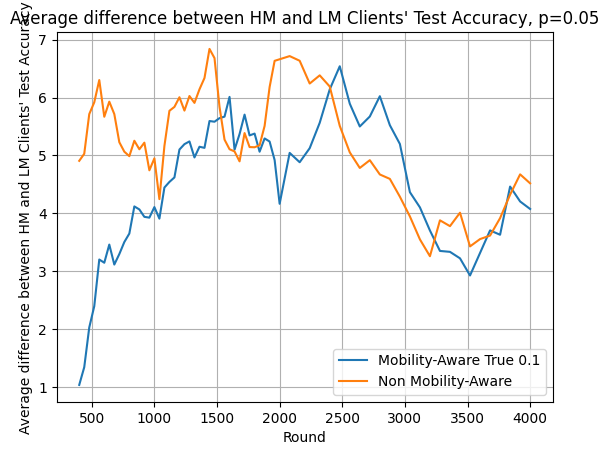

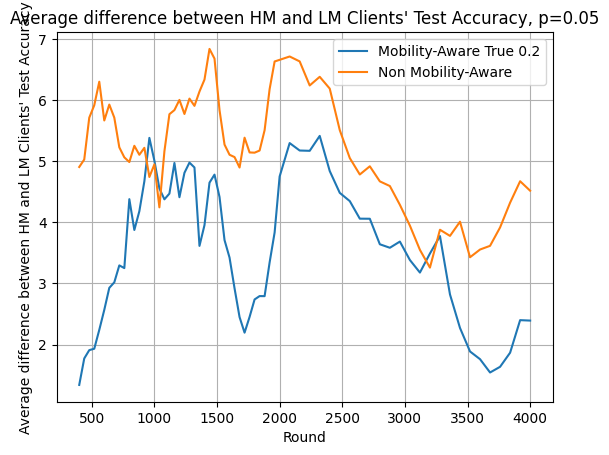

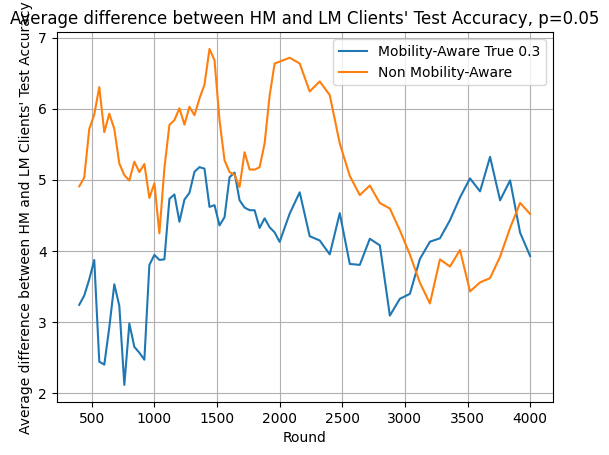

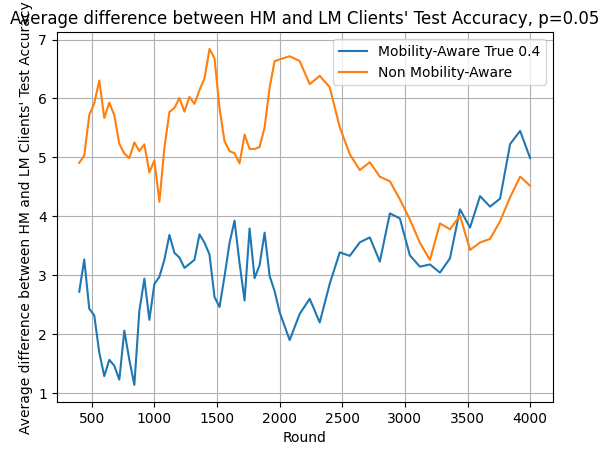

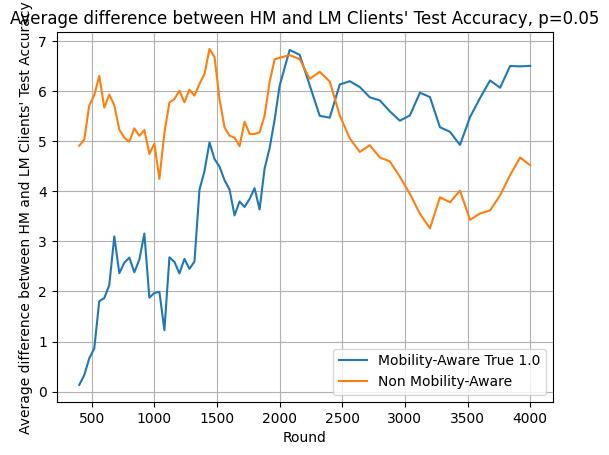

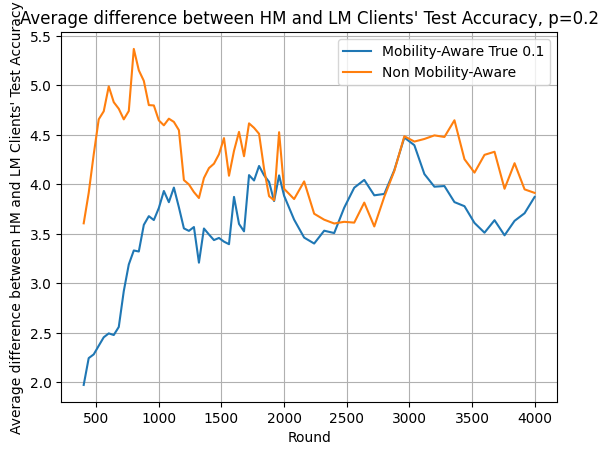

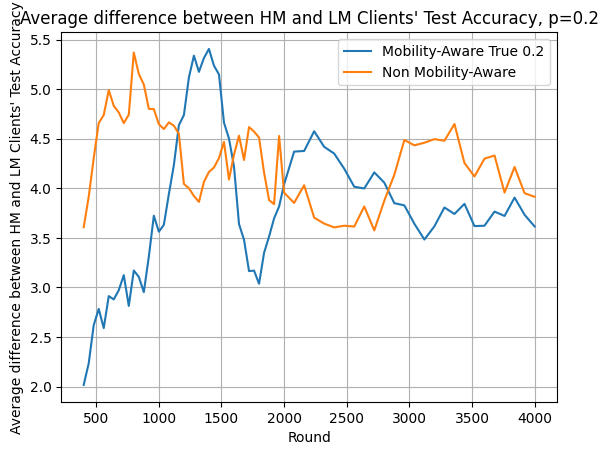

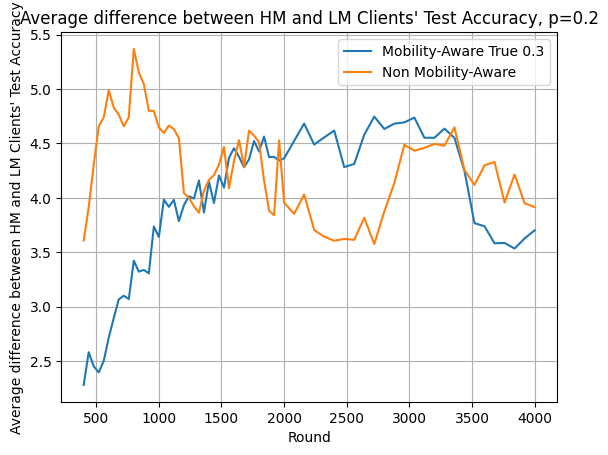

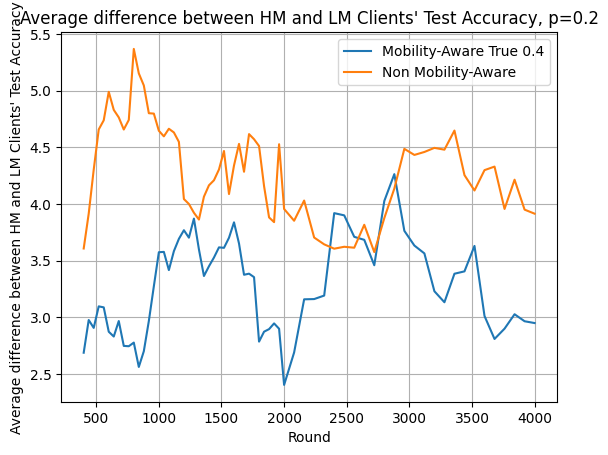

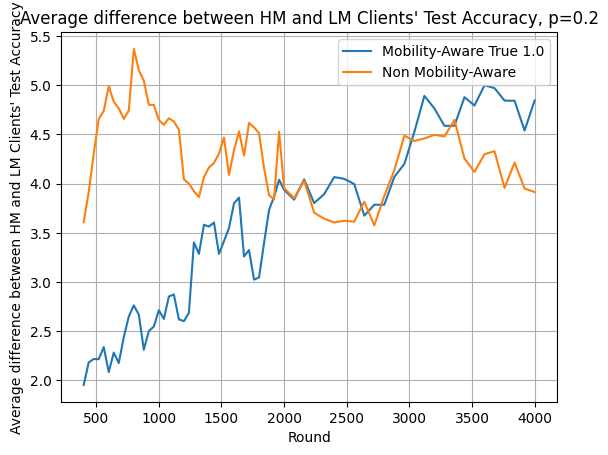

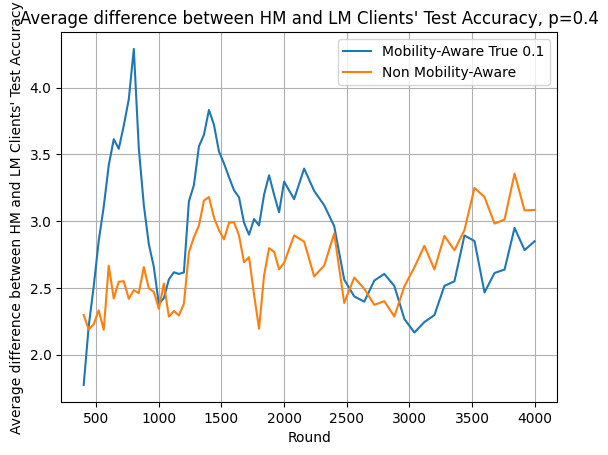

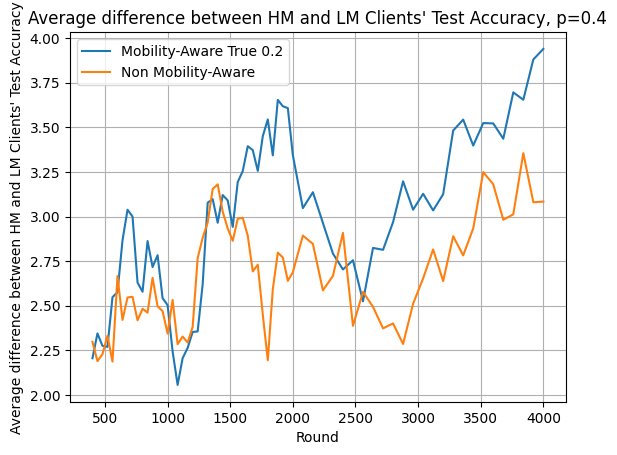

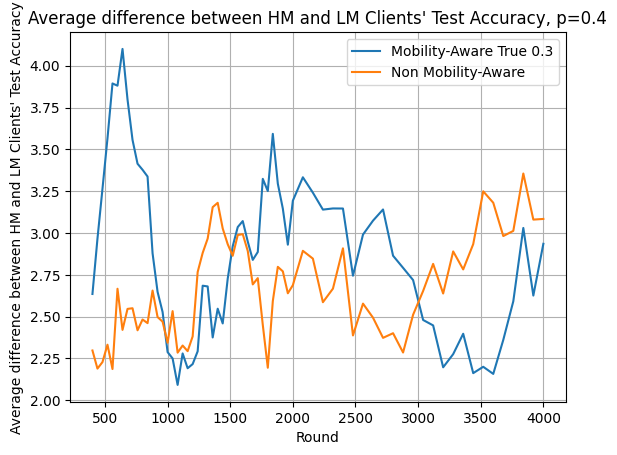

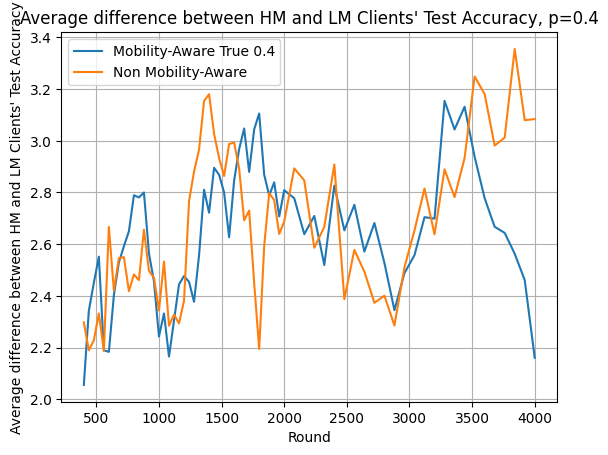

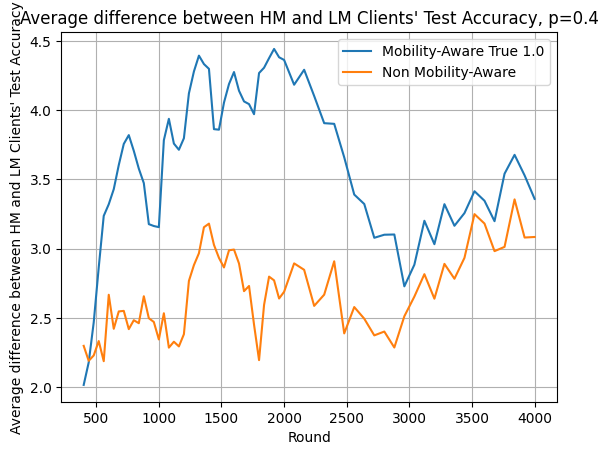

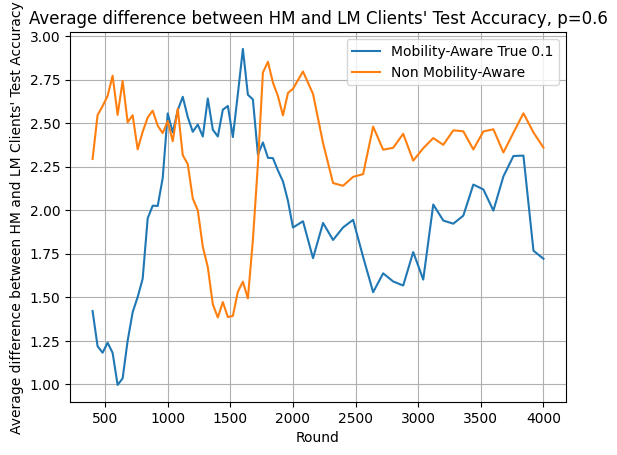

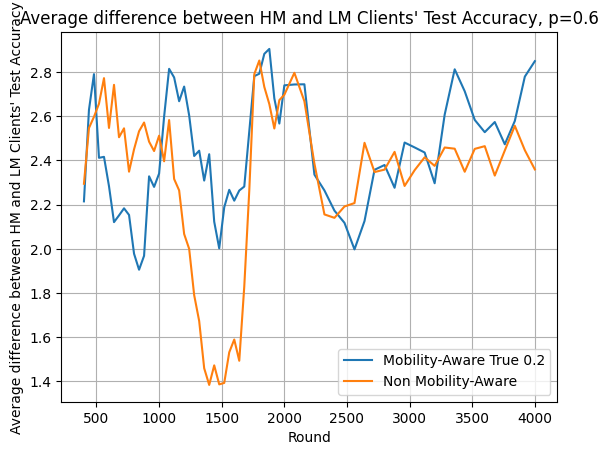

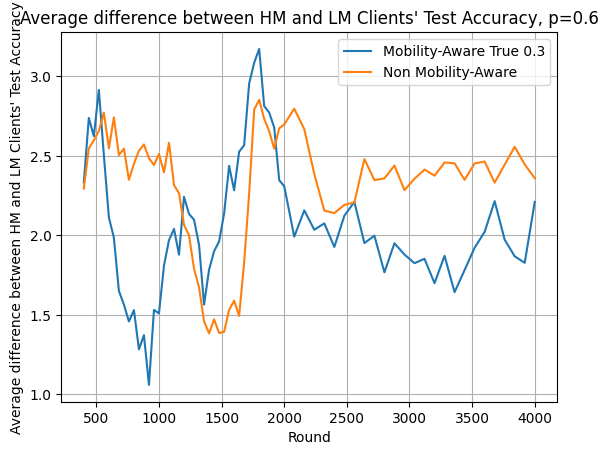

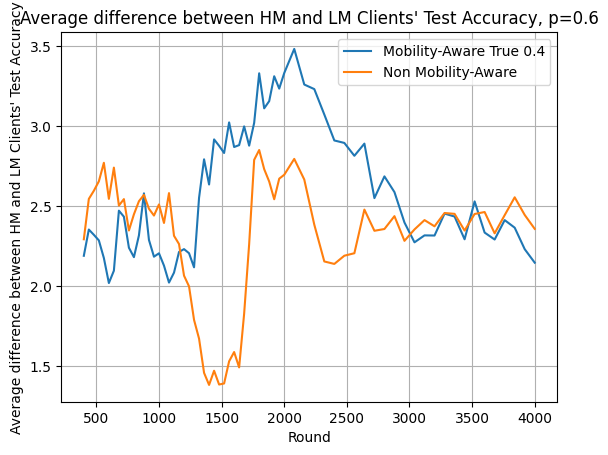

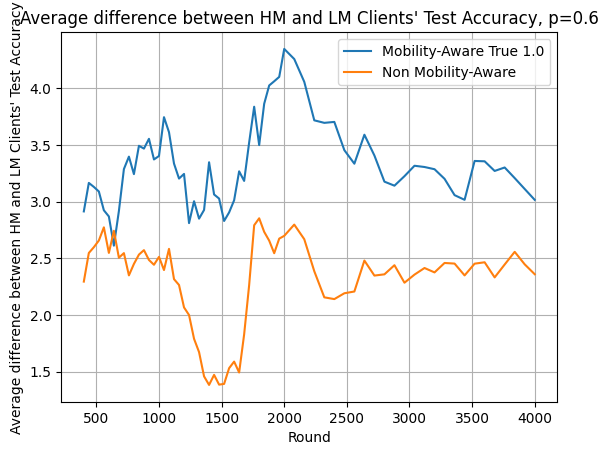

In [46]:
def plot_diffs_per_round(p, experiment):
    file_name = "saved_figures/diff_analysis_mobility_aware.json"
    with open(file_name) as file:
        content = json.load(file)

        exp_key = str(p)

        algo_key = experiment.key()
        
        if algo_key not in content[exp_key]:
            raise ValueError("Missing data for comparison, experiment", experiment)

        algo_exp_diffs = content[exp_key][algo_key]['diff_per_round']
        
        plt.figure()
        rounds, acc_values = zip(*algo_exp_diffs.items())
        rounds = [int(x) for x in rounds]
        # Do moving average on acc_values
        rounds = rounds[9:]
        acc_values = np.convolve(acc_values, np.ones(10)/10, mode='valid')
        plt.plot(rounds, acc_values, label=f"Mobility-Aware {experiment.mobility_aware} {experiment.alpha}")

        baseline_exp_diffs = content[exp_key][baseline.key()]['diff_per_round']

        rounds, acc_values = zip(*baseline_exp_diffs.items())
        rounds = [int(x) for x in rounds]
        # Do moving average on acc_values
        rounds = rounds[9:]
        acc_values = np.convolve(acc_values, np.ones(10)/10, mode='valid')
        plt.plot(rounds, acc_values, label="Non Mobility-Aware")

        plt.xlabel("Round")
        plt.ylabel("Average difference between HM and LM Clients' Test Accuracy")
        plt.title(f"Average difference between HM and LM Clients' Test Accuracy, p={p}")
        plt.legend()
        plt.grid(True)
        # fig_dir = f"saved_figures/{experiment_dir}"
        # if not os.path.exists(fig_dir):
        #     os.makedirs(fig_dir)
            

        #     plt.savefig(f"{fig_dir}/test_accuracy_group_{[str(s) for s in experiments]}_{experiment_group}_{experiment_dir}.pdf")
        # if show:
        #     plt.show()

interesting_ps = [0.05, 0.2, 0.4, 0.6]
for p in interesting_ps:
    for experiment in sol_experiments:
        plot_diffs_per_round(p, experiment)
